[[  0   0 100]
 [  1   0 100]
 [  2   0 100]
 [  3   1 120]
 [  4   3  20]
 [  5   2 200]
 [  6   2 200]
 [  7   1 120]
 [  8   3  20]
 [  9   1 120]
 [ 10   1 120]
 [ 11   0 100]
 [ 12   1 120]
 [ 13   0 100]
 [ 14   0 100]
 [ 15   2 200]
 [ 16   1 120]
 [ 17   1 120]
 [ 18   2 200]
 [ 19   3  20]]


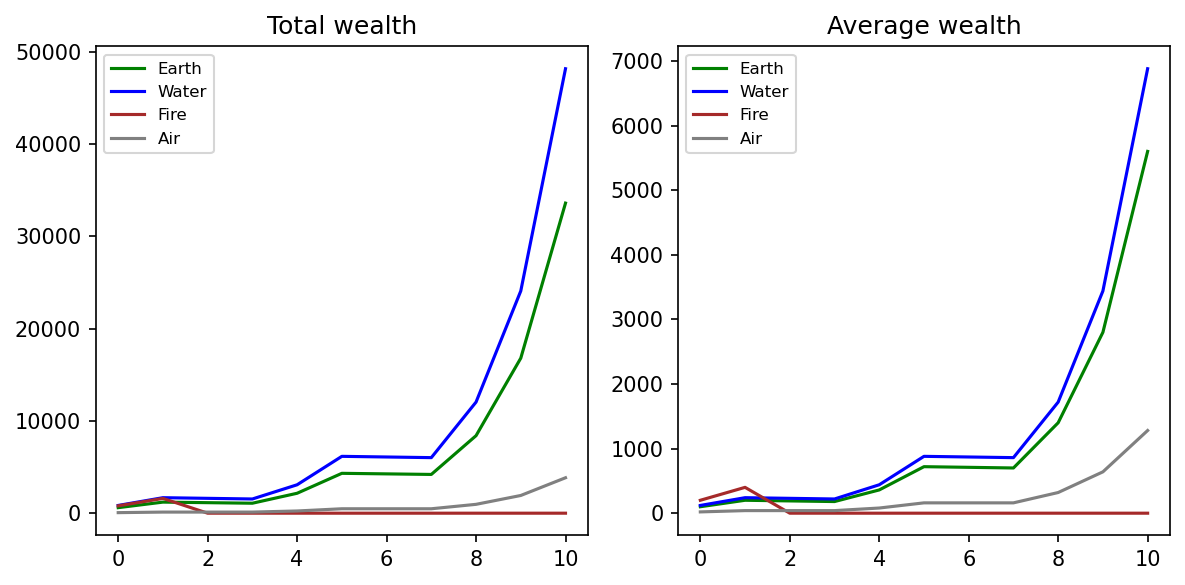

[[6.000e+00 7.000e+00 4.000e+00 3.000e+00 6.000e+02 8.400e+02 8.000e+02
  6.000e+01 1.000e+02 1.200e+02 2.000e+02 2.000e+01]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 1.200e+03 1.680e+03 1.600e+03
  1.200e+02 2.000e+02 2.400e+02 4.000e+02 4.000e+01]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 1.140e+03 1.610e+03 0.000e+00
  1.200e+02 1.900e+02 2.300e+02 0.000e+00 4.000e+01]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 1.080e+03 1.540e+03 0.000e+00
  1.200e+02 1.800e+02 2.200e+02 0.000e+00 4.000e+01]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 2.160e+03 3.080e+03 0.000e+00
  2.400e+02 3.600e+02 4.400e+02 0.000e+00 8.000e+01]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 4.320e+03 6.160e+03 0.000e+00
  4.800e+02 7.200e+02 8.800e+02 0.000e+00 1.600e+02]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 4.260e+03 6.090e+03 0.000e+00
  4.800e+02 7.100e+02 8.700e+02 0.000e+00 1.600e+02]
 [6.000e+00 7.000e+00 4.000e+00 3.000e+00 4.200e+03 6.020e+03 0.000e+00
  4.800e+02 7.000e+02 8.600e+02 0.000e+00 1.600e+02]


In [7]:
# CS 201 1-30-2022

import numpy as np
import matplotlib.pyplot as plt

def savedata(d, t, data):
    
    # data[t, 0] = np.sum(d[:, 1] == 0) # total number of dragons type 0
    # data[t, 1] = np.sum(d[:, 1] == 1)
    # data[t, 2] = np.sum(d[:, 1] == 2)
    # data[t, 3] = np.sum(d[:, 1] == 3)
    # data[t, 4] = np.sum(d[d[:, 1] == 0, 2])
    # data[t, 5] = np.sum(d[d[:, 1] == 1, 2])
    # data[t, 6] = np.sum(d[d[:, 1] == 2, 2])
    # data[t, 7] = np.sum(d[d[:, 1] == 3, 2])
    # data[t, 8] = data[t, 4] / data[t, 0] # average: total / number of given type
    # data[t, 9] = data[t, 5] / data[t, 1]
    # data[t, 10] = data[t, 6] / data[t, 2]
    # data[t, 11] = data[t, 7] / data[t, 3]
    
    for i in range(4):
        data[t, i] = np.sum(d[:, 1] == i)     
        data[t, i+4] = np.sum(d[d[:, 1] == i, 2]) 
        data[t, i+8] = data[t, i+4] / data[t, i]
    
    return data

N = 20
T = 10

probs = [0.5, 0.3, 0.1, 0.1] # initial probs

# 0-own id, 1-type, 2-wealth
d = np.zeros((N, 3), dtype = np.int32)

d[:, 0] = np.arange(N)
# d[0:N, 0] = np.arange(N) # same

d[:, 1] = np.argmax(np.random.multinomial(1, probs, N), axis = 1)

d[d[:, 1] == 0, 2] = 100
d[d[:, 1] == 1, 2] = 120
d[d[:, 1] == 2, 2] = 200
d[d[:, 1] == 3, 2] = 20
print(d)

data = np.zeros((T+1, 12)) # 4 types, for each: number, total W, average W

data = savedata(d, 0, data)

for t in range(T): # repeat T times
    event = np.random.binomial(1, 0.5, 1)    
    if event == 1:
        d[d[:, 1] < 2, 2] -= 10
        d[d[:, 1] == 2, 2] = 0    
    else:
        d[:, 2] = d[:, 2] * 2
        
    data = savedata(d, t+1, data)

plt.figure(num=1, figsize=(8,4), dpi=150)
x = range(0, T+1)

plt.subplot(121)
plt.plot(x, data[:, 4], color="green", label="Earth")
plt.plot(x, data[:, 5], color="blue", label="Water")
plt.plot(x, data[:, 6], color="brown", label="Fire")
plt.plot(x, data[:, 7], color="grey", label="Air")
plt.title("Total wealth")
plt.legend(loc = "best", fontsize = 8)

plt.subplot(122)
plt.plot(x, data[:, 8], color="green", label="Earth")
plt.plot(x, data[:, 9], color="blue", label="Water")
plt.plot(x, data[:, 10], color="brown", label="Fire")
plt.plot(x, data[:, 11], color="grey", label="Air")
plt.title("Average wealth")
plt.legend(loc = "best", fontsize = 8)

plt.tight_layout()
plt.show()
print(data)